In [1]:
exec(open("init_notebook.py").read())

current working dirC:\Users\abjawad\Documents\GitHub\junction-art


In [6]:
import pyodrx, extensions
from library.Configuration import Configuration
import numpy as np
from junctions.RoadBuilder import RoadBuilder
from junctions.JunctionBuilder import JunctionBuilder
from junctions.AngleCurvatureMap import AngleCurvatureMap
from junctions.StandardCurveTypes import StandardCurveTypes
from junctions.StraightRoadBuilder import StraightRoadBuilder


import pyodrx
import math
from scipy.special import fresnel

In [3]:
roadBuilder = RoadBuilder()
straightRoadBuilder = StraightRoadBuilder()
junctionBuilder = JunctionBuilder()
configuration = Configuration()
angleCurvatureMap = AngleCurvatureMap()
esminiPath = configuration.get("esminipath")

{'test': 'This is nothing', 'test2': {'test22': 'this is something'}, 'esminipath': 'C:\\Users\\abjaw\\Documents\\GitHub\\esmini', 'rootPath': 'C:\\Users\\abjaw\\Documents\\GitHub\\junction-art'}


In [4]:
# check if dict has key
def check_key(dict, key):
    if key in dict.keys():
        return True
    return False

#add to dict if the value is not in list
def add_to_dict(dict, key, val):
    key = (key[0]*10,key[1]*10)
    floor_keyX, ceil_keyX = math.floor(key[0]), math.ceil(key[0])
    floor_keyY, ceil_keyY = math.floor(key[1]), math.ceil(key[1])
    keys = [(floor_keyX, floor_keyY), (floor_keyX, ceil_keyY), (ceil_keyX, floor_keyY), (ceil_keyX, ceil_keyY)]
    for key in keys:
        key = (key[0]/10,key[1]/10)
        if check_key(dict, key):
            if val[0] in dict[key]:
                return
            else:
                dict[key] = dict.get(key, []) + val
        else:
            dict[key] = val
            
# planview x, y, h for a given road            
def get_planview_start_xyh(road):
    pv = road.planview
    return pv.x_start,pv.y_start, pv.h_start

def get_planview_end_xyh(road):
    pv = road.planview
    return pv.x_end,pv.y_end, pv.h_end


In [ ]:
for l in np.arange(0.0, 20.1, 0.1):
    print(l)

ERROR:root:The road object do not have extended lanes properties. Please, update your code.


starting adjustment. May freeze!!!!!!!!!!!!!
start points starting
C:\Users\abjaw\Documents\GitHub\esmini\bin\odrplot.exe C:/Users/abjaw/Documents/GitHub/esmini/bin/pythonroad.xodr


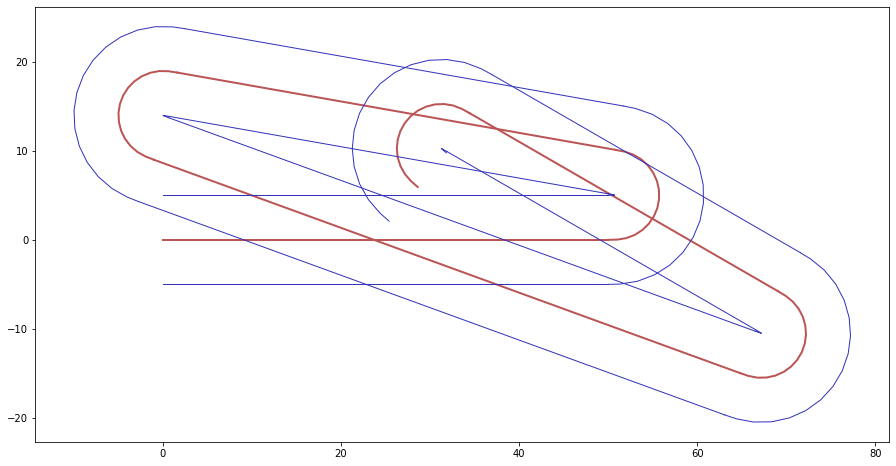

In [72]:
#creating roads

angle = 10
numberofLanes = 1
laneOffset = 10
curve, angle = angleCurvatureMap.getCurvatureForNonOverlappingRoads(angle, numberofLanes, laneOffset)
roads = []
roads.append(pyodrx.create_straight_road(0, 50,  n_lanes=numberofLanes, lane_offset=laneOffset))
roads.append(roadBuilder.createSimpleCurveWithLongArcWithLaneNumberandOffset(1, angle, False, curvature = curve, _n_lanes = numberofLanes, _lane_offset=laneOffset))
roads.append(pyodrx.create_straight_road(2, 50, n_lanes=numberofLanes, lane_offset=laneOffset))
roads.append(roadBuilder.createSimpleCurveWithLongArcWithLaneNumberandOffset(3, angle, False, curvature = curve, _n_lanes = numberofLanes, _lane_offset=laneOffset))
roads.append(pyodrx.create_straight_road(4, 70, n_lanes=numberofLanes, lane_offset=laneOffset))
roads.append(roadBuilder.createSimpleCurveWithLongArcWithLaneNumberandOffset(5, angle, False, curvature = curve, _n_lanes = numberofLanes, _lane_offset=laneOffset))
roads.append(pyodrx.create_straight_road(6, 40, n_lanes=numberofLanes, lane_offset=laneOffset))
roads.append(roadBuilder.createSimpleCurveWithLongArcWithLaneNumberandOffset(7, angle, False, curvature = curve, _n_lanes = numberofLanes, _lane_offset=laneOffset))
roads.append(pyodrx.create_straight_road(8, 40, n_lanes=numberofLanes, lane_offset=laneOffset))

roads[0].add_successor(pyodrx.ElementType.road,1,pyodrx.ContactPoint.start)

roads[1].add_predecessor(pyodrx.ElementType.road,0,pyodrx.ContactPoint.end)
roads[1].add_successor(pyodrx.ElementType.road,2,pyodrx.ContactPoint.start)

roads[2].add_predecessor(pyodrx.ElementType.road,1,pyodrx.ContactPoint.end)
roads[2].add_successor(pyodrx.ElementType.road,3,pyodrx.ContactPoint.start)

roads[3].add_predecessor(pyodrx.ElementType.road,2,pyodrx.ContactPoint.end)
roads[3].add_successor(pyodrx.ElementType.road,4,pyodrx.ContactPoint.start)

roads[4].add_predecessor(pyodrx.ElementType.road,3,pyodrx.ContactPoint.end)
roads[4].add_successor(pyodrx.ElementType.road,5,pyodrx.ContactPoint.start)

roads[5].add_predecessor(pyodrx.ElementType.road,4,pyodrx.ContactPoint.end)
roads[5].add_successor(pyodrx.ElementType.road,6,pyodrx.ContactPoint.start)

roads[6].add_predecessor(pyodrx.ElementType.road,5,pyodrx.ContactPoint.end)
roads[6].add_successor(pyodrx.ElementType.road,7,pyodrx.ContactPoint.start)

roads[7].add_predecessor(pyodrx.ElementType.road,6,pyodrx.ContactPoint.end)
roads[7].add_successor(pyodrx.ElementType.road,7,pyodrx.ContactPoint.start)

odrName = "curve_test"

odr = extensions.createOdr(odrName, roads, [])
extensions.view_road(odr, esminiPath)

In [ ]:
for geom in roads[0].planview._adjusted_geometries:
    print(geom.length)

In [6]:
#straight road interpolation dict
def add_coordinate_to_dict_straight_road(dict, road, thres=0.1):
    startX, startY, startH = get_planview_start_xyh(road)
    endX, endY, endH = get_planview_end_xyh(road)
    length = math.sqrt((startX - endX)**2 + (startY - endY)**2)
    for l in np.arange(0, length, thres):
        l=round(l,1)
        new_x = l*np.cos(startH) + startX
        new_y = l*np.sin(startH) + startY
        add_to_dict(dict, (new_x, new_y), [road.id])
        

In [39]:
# for spiral
def add_coordinate_to_dict_spiral_geom(dict, spiral_geom, road_id, thres=0.1):
    x, y, hdg, spiral_length = spiral_geom.x, spiral_geom.y, spiral_geom.heading, spiral_geom.length 
    curvStart = spiral_geom.geom_type.curvstart
    curvEnd = spiral_geom.geom_type.curvend
    spiral = pyodrx.EulerSpiral.createFromLengthAndCurvature(spiral_length, curvStart, curvEnd)
    for l in np.arange(0, spiral_length, thres):
        l=round(l,1)
        deltax, deltay, _ = spiral.calc(l, x, y, curvStart, hdg)
        add_to_dict(dict, (deltax, deltay), [road_id])

In [57]:
# code for arc interpolation
def get_intermediate_point_at_length_arc(length,x,y,h, curve):
    radius = 1/np.abs(curve)
    if curve < 0:
        phi_0 = h + np.pi/2
        x_0 = x - np.cos(phi_0)*radius
        y_0 = y - np.sin(phi_0)*radius
    else:
        phi_0 = h - np.pi/2
        x_0 = x - np.cos(phi_0)*radius
        y_0 = y - np.sin(phi_0)*radius
    angle = length * curve        # s = r*theta -> theta = s/r -> theta = s * curve
    new_ang = angle + phi_0
    new_x = np.cos(new_ang)*radius + x_0
    new_y = np.sin(new_ang)*radius + y_0
    return new_x, new_y
    
def add_coordinate_to_dict_arc_geom(dict, arc_geom, road_id, thres=0.1):
    x, y, hdg, arc_length = arc_geom.x, arc_geom.y, arc_geom.heading, arc_geom.length
    curve = arc_geom.geom_type.curvature
    print(x, y, hdg, arc_length, curve)
    for l in np.arange(0, arc_length, thres):
        l=round(l,1)
        new_x, new_y = get_intermediate_point_at_length_arc(l, x, y, hdg, curve)
        add_to_dict(dict, (new_x, new_y), [road_id])
        

In [59]:
def add_coordinate_to_dict_longarc_road(dict, road):
    add_coordinate_to_dict_spiral_geom(dict, road.planview._adjusted_geometries[0], road.id)
    add_coordinate_to_dict_arc_geom(dict, road.planview._adjusted_geometries[1], road.id)
    add_coordinate_to_dict_spiral_geom(dict, road.planview._adjusted_geometries[2], road.id)

In [61]:
def create_intersection_dict(roads):
    dict = {}
    for road in roads:
        if road.curveType == StandardCurveTypes.Line:
            add_coordinate_to_dict_straight_road(dict, road)
        elif road.curveType == StandardCurveTypes.LongArc:
            add_coordinate_to_dict_longarc_road(dict, road)
    return dict

In [73]:
dict = create_intersection_dict(roads)
for val in dict.values():
    if len(val) > 1:
        print(val)

51.48026814645525 0.07324678176231701 0.14835298716128295 13.351768777756623 0.2
0.171797607061414 18.956444913383812 3.115412717035174 13.351768777756623 0.2
66.21559672219522 -15.389900156999975 6.082472446909064 13.351768777756623 0.2
33.120093659320915 14.903032146478722 9.049532176782956 13.351768777756623 0.2
[0, 4]
[0, 4]
[0, 4]
[0, 4]
[0, 4]
[0, 4]
[1, 6]
[1, 6]
[1, 6]
[1, 2]
[1, 2]
[2, 6]
[2, 6]
[2, 6]
[2, 6]
[2, 6]
[2, 6]
[2, 6]
[2, 6]
[2, 6]
[2, 6]
[2, 6]
[2, 7]
[2, 7]
[2, 7]
[2, 7]
[2, 3]
[2, 3]
[2, 3]
[2, 3]
[4, 5]
[4, 5]
[5, 6]
[6, 7]


In [ ]:
# code for spiral interpolation
def spiral_interp_centre(distance, x, y, hdg, length, curvEnd):
    '''Interpolate for a spiral centred on the origin'''
    # s doesn't seem to be needed...
    theta = hdg                    # Angle of the start of the curve
    Ltot = length                  # Length of curve
    Rend = 1 / curvEnd             # Radius of curvature at end of spiral

    # Rescale, compute and unscale
    a = 1 / math.sqrt(2 * Ltot * Rend)  # Scale factor
    distance_scaled = distance * a # Distance along normalised spiral
    deltay_scaled, deltax_scaled = fresnel(distance_scaled)
    deltax = deltax_scaled / a
    deltay = deltay_scaled / a

    # deltax and deltay give coordinates for theta=0
    deltax_rot = deltax * math.cos(theta) - deltay * math.sin(theta)
    deltay_rot = deltax * math.sin(theta) + deltay * math.cos(theta)

    # Spiral is relative to the starting coordinates
    xcoord = x + deltax_rot
    ycoord = y + deltay_rot

    return xcoord, ycoord

def add_coordinate_to_dict_spiral_geom(dict, road_geom, road_id):
    startX, startY, curvStart, length = road_geom.get_start_data()
    endX, endY, curvEnd, length = road_geom.get_end_data()
    for n in range(0, 100+1):
        new_x, new_y = spiral_interp_centre(n, startX, startY, curvStart, length, curvEnd)
        add_to_dict(dict, (new_x, new_y), [road_id])

        
#simplified spiral
def spiral_interpolate(distance, x, y, hdg, spiral_length, curvStart, curvEnd):
    spiral = pyodrx.EulerSpiral.createFromLengthAndCurvature(spiral_length, curvStart, curvEnd)
    (deltax, deltay, t) = spiral.calc(distance, x, y, curvStart, hdg)
    return deltax, deltay

def get_intermediate_point_at_length_spiral(length, spiral_geom):
    x, y, hdg, spiral_length = spiral_geom.x, spiral_geom.y, spiral_geom.heading, spiral_geom.length 
    curvStart = spiral_geom.geom_type.curvstart
    curvEnd = spiral_geom.geom_type.curvend
    newX, newY = spiral_interpolate(length, x, y, hdg, spiral_length, curvStart, curvEnd)
    return newX, newY

    

tests

In [ ]:
get_intermediate_point_at_length_spiral( 0,roads[1].planview._adjusted_geometries[0])
print(get_intermediate_point_at_length_arc(7.85, 5, 0, 0, 0.2))

In [ ]:
for i in range(0, 3):
    geom = roads[1].planview._adjusted_geometries[i] 
    print(geom.x, geom.y, geom.heading, geom.length)
#     print(geom.x, geom.y, geom.h)
#     print(roads[1].planview._adjusted_geometries[i].get_end_data())

In [ ]:
dict = {}
add_to_dict(dict, (0.1, 4.5), [1])

In [ ]:
print(get_planview_start_xyh(roads[1]))
print(get_planview_end_xyh(roads[1]))

In [ ]:
dict = {}
add_coordinate_to_dict_straight_road(dict, roads[0])
add_coordinate_to_dict_straight_road(dict, roads[4])

In [ ]:
dict = {}
add_coordinate_to_dict_longarc_road(dict, roads[1])
dict

In [ ]:
dict = {}
add_coordinate_to_dict_spiral_geom(dict, roads[1].planview._adjusted_geometries[0], 1, 0.1)
add_coordinate_to_dict_spiral_geom(dict, roads[1].planview._adjusted_geometries[2], 1, 0.1)

In [ ]:
dict = {}
add_coordinate_to_dict_arc_geom(dict, roads[1].planview._adjusted_geometries[1], 1, 0.1)
dict